# Exam R
NAME = "Bram Gubbels, 2014362"
COLLABORATORS = "Sam Hamers, 2014708"

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [14]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [15]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

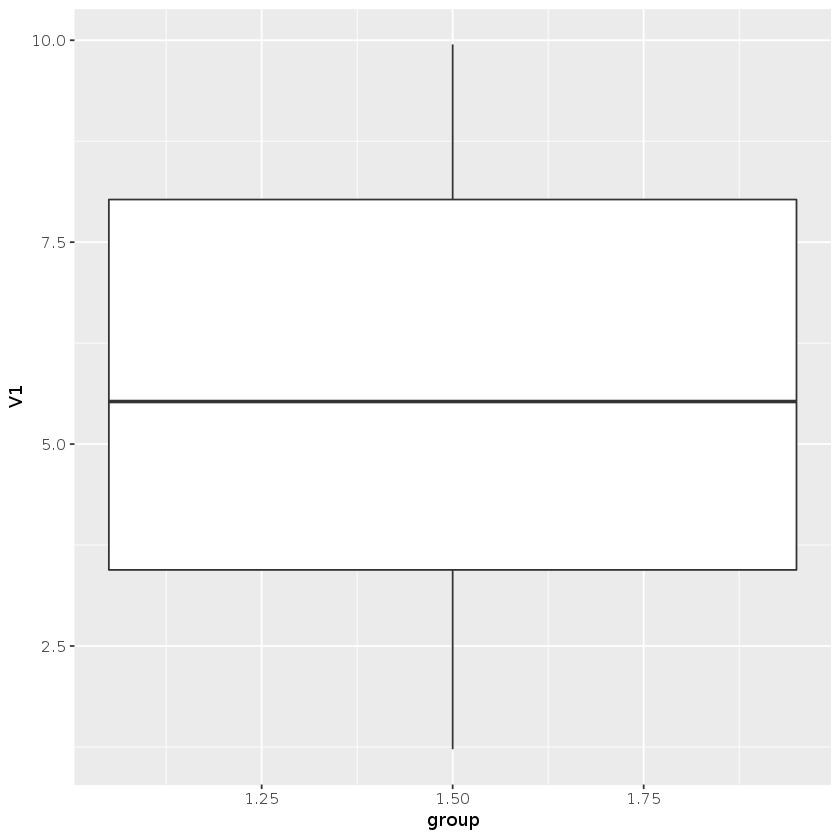

In [16]:
ggplot(data=df1, aes(x=group , y=V1)) + 
  geom_boxplot()


## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [17]:
reg1 <- lm(V1~group, data=df1) #lm for linear regression model
summary(reg1)


Call:
lm(formula = V1 ~ group, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49501 -1.05796  0.02595  1.34275  2.37341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4450     0.6707  -2.154   0.0363 *  
group         4.5100     0.4052  11.130 6.78e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.414 on 48 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7149 
F-statistic: 123.9 on 1 and 48 DF,  p-value: 6.783e-15


check if the assumptions of linear regression are met with the `gvlma()` function.

In [18]:
gvlma_check <- gvlma(reg1)
summary(gvlma_check)


Call:
lm(formula = V1 ~ group, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49501 -1.05796  0.02595  1.34275  2.37341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4450     0.6707  -2.154   0.0363 *  
group         4.5100     0.4052  11.130 6.78e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.414 on 48 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7149 
F-statistic: 123.9 on 1 and 48 DF,  p-value: 6.783e-15


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                       Value p-value                Decision
Global Stat        3.756e+00  0.4401 Assumptions acceptable.
Skewness           1.037e-01  0.7474 Assumptions acceptable.
Kurtosis           2.627e+00  0.1050 Assumptions acceptable.
Link Function      1.866e-16  1.0000 Assumptions

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



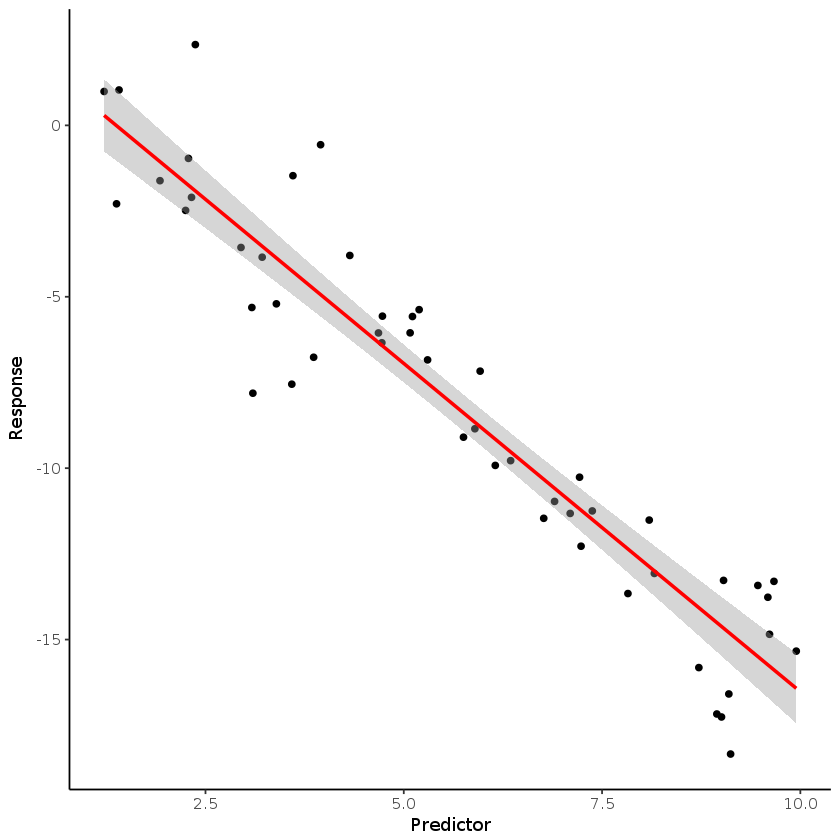

In [19]:
plot1 <- ggplot(data=df1, aes(x=V1, y=response)) + #create scatter plot of data
        geom_point()

plot2 <- plot1 + geom_smooth(method="lm", se=TRUE, color='red') + #use plot1 + a linear regression model line
                theme_classic() +
                xlab('Predictor') + ylab('Response')
plot2

# Assigment 2

# Packages

In [20]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [21]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors=FALSE, dec=".")
head(map_municipal)


name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

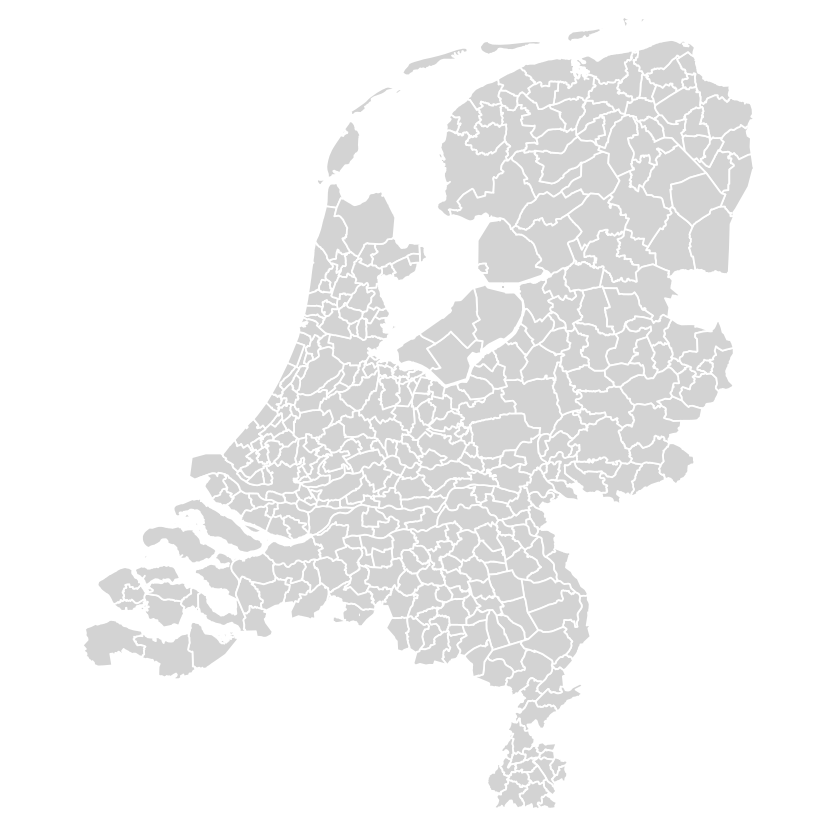

In [22]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [23]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv") %>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [24]:
schools <- read.csv2("../Sourcedata/schools.csv", stringsAsFactor=FALSE, dec=".")
str(schools) #to show the variable schools

'data.frame':	1603 obs. of  31 variables:
 $ PROVINCIE                                 : chr  "                    " "Drenthe" "Drenthe" "Drenthe" ...
 $ BEVOEGD.GEZAG.NUMMER                      : int  41152 10053 10053 13273 13273 13273 13273 13273 13273 13273 ...
 $ BRIN.NUMMER                               : chr  "23HC" "18BR" "18BR" "20LO" ...
 $ VESTIGINGSNUMMER                          : chr  "23HC04" "18BR00" "18BR01" "20LO00" ...
 $ VESTIGINGSNAAM                            : chr  "RSG Lingecollege" "School voor Praktijkonderwijs Assen" "School voor Praktijkonderwijs Assen" "Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo" ...
 $ STRAATNAAM                                : chr  "                        " "Zwartwatersweg" "Bosrand" "Mr Groen v Prinstererln" ...
 $ HUISNUMMER.TOEVOEGING                     : chr  "            " "202" "2" "98" ...
 $ POSTCODE                                  : chr  "       " "9406 NN" "9401 SL" "9402 KG" ...
 $ PLAATSNAA

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [31]:
schools1 <- schools %>%
    mutate(PC4 = as.integer(substr(POSTCODE,1,4))) %>% #Make an integer from PC4, so we can join them in the next assignment
    select(PC4, DENOMINATIE)
schools1 #to show the new variable schools1

PC4,DENOMINATIE
NA,Openbaar
9406,Openbaar
9401,Openbaar
9402,Openbaar
9331,Openbaar
9411,Openbaar
9461,Openbaar
9402,Openbaar
9402,Openbaar
9403,Openbaar


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [32]:
school_loc <- inner_join(pc4_locations, schools1, by="PC4")

RKPC <- school_loc %>%
        filter(DENOMINATIE == "Rooms-Katholiek" | DENOMINATIE == "Protestants-Christelijk" )

RKPC

PC4,X,Y,DENOMINATIE
1065,116701.2,485645.8,Protestants-Christelijk
1071,120223.0,485571.3,Rooms-Katholiek
1077,120152.7,484262.8,Rooms-Katholiek
1077,120152.7,484262.8,Protestants-Christelijk
1081,118277.6,482449.5,Protestants-Christelijk
1132,132947.2,501873.0,Rooms-Katholiek
1132,132947.2,501873.0,Rooms-Katholiek
1185,118214.4,478212.6,Protestants-Christelijk
1185,118214.4,478212.6,Rooms-Katholiek
1211,140459.1,470645.8,Rooms-Katholiek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


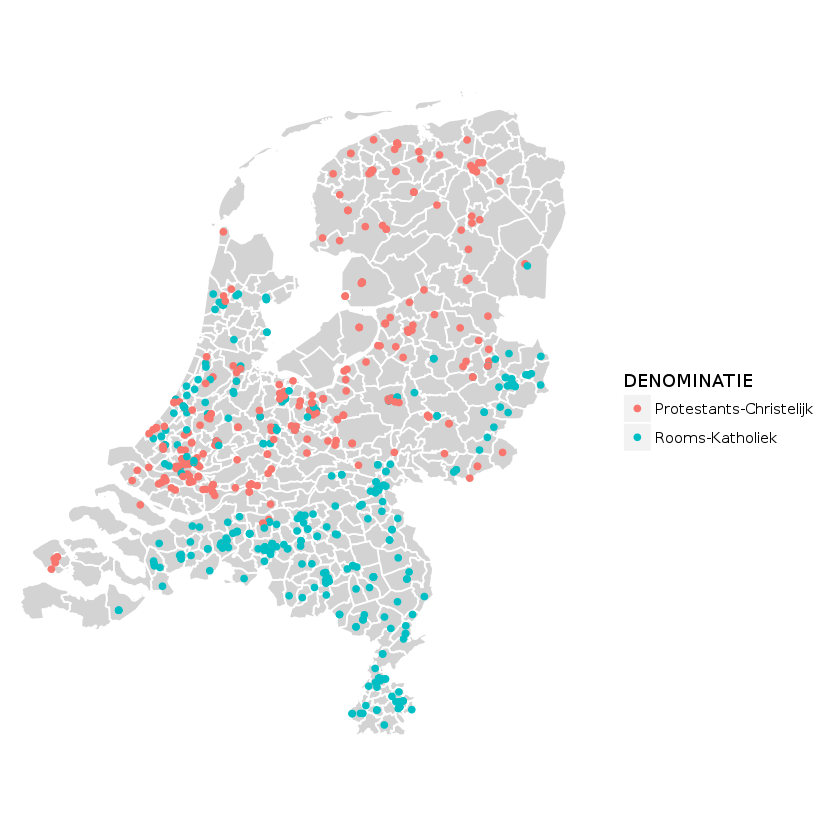

In [35]:
 AddMapLayer(MapPlot(), map_municipal) %>%
  AddPointsLayer(RKPC, columnNameColor= "DENOMINATIE")# different colors for different type of schools

End of notebook